
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

** **bold text**Answer: ** 

### CLASSIFICATION
It is a Supervised Learning task where output is having defined labels,Here in this problem a student will pass/fail.

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
# Read student data
data=pd.read_csv('student-data.csv')
data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# Calculate number of students
n_students=data.shape[0]

In [4]:
# Calculate number of features
n_features=len(data.columns)-1

In [5]:
# Calculate passing students
PS=data['passed'].value_counts()['yes']

In [6]:
# Calculate failing students
FS=data['passed'].value_counts()['no']

In [7]:
# Calculate graduation rate
GR=round(PS/(PS+FS)*100)

In [8]:
# Print the results
print("Total number of students is",n_students)
print("Total number of features of the dataset is",n_features)
print("Total number of passed students is",PS)
print("Total number of failed students is",FS)
print("the Graduation Rate is",GR,"%")

Total number of students is 395
Total number of features of the dataset is 30
Total number of passed students is 265
Total number of failed students is 130
the Graduation Rate is 67 %


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [9]:
# Extract feature columns

In [10]:
data.columns[:-1]

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

In [11]:
# Extract target column 'passed'

In [12]:
data.columns[-1]

'passed'

In [13]:
# Separate the data into feature data and target data (X and y, respectively)

In [14]:
X=data.drop(['passed'],axis=1)
y=data['passed']

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [15]:
X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

In [16]:
X=X.replace(to_replace ="yes",value =1)

In [17]:
X=X.replace(to_replace ="no",value =0)

In [18]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,0,0,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,0,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,1,0,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,1,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,0,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,1,0,0,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,1,1,0,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,1,0,0,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,1,0,4,4,1,3,4,5,0


In [19]:
X=pd.get_dummies(X)

In [20]:
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [21]:
# splitting the data into train and test


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [23]:
# Show the results of the split


In [24]:
X_train.shape

(296, 48)

In [25]:
X_test.shape

(99, 48)

### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [26]:
#explaination

In [27]:
#### LogisticRegression-Logistic regression is easier to implement, interpret, and very efficient to train.

In [28]:
#### Random Forest-Excellent Predictive Powers & Suitable for large data

In [29]:
#### KNN-Quick calculation time & Simple algorithm – to interpret 


In [30]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression

In [31]:
# fit model-1  on traning data 

### LogisticRegression

In [32]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)

C:\Users\Benny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# predict on the test data 

In [34]:
predictions

array(['no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no',
       'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes'], dtype=object)

In [35]:
# calculate the accuracy score

In [36]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [37]:
accuracy_score(y_test,predictions)

0.7070707070707071

In [38]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [40]:
y_pred

array(['no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [41]:
accuracy_score(y_test,y_pred)

0.6868686868686869

In [42]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

### KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(5,50)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc=accuracy_score(y_test, pred)
    acc_values.append(acc)

In [44]:
 acc_values

[0.6666666666666666,
 0.6262626262626263,
 0.6363636363636364,
 0.6060606060606061,
 0.6565656565656566,
 0.6262626262626263,
 0.6363636363636364,
 0.6161616161616161,
 0.6565656565656566,
 0.6767676767676768,
 0.6666666666666666,
 0.6565656565656566,
 0.6363636363636364,
 0.6666666666666666,
 0.6666666666666666,
 0.6868686868686869,
 0.6666666666666666,
 0.6767676767676768,
 0.6464646464646465,
 0.6868686868686869,
 0.6565656565656566,
 0.6666666666666666,
 0.6565656565656566,
 0.6767676767676768,
 0.6565656565656566,
 0.6565656565656566,
 0.6464646464646465,
 0.6565656565656566,
 0.6565656565656566,
 0.6565656565656566,
 0.6565656565656566,
 0.6565656565656566,
 0.6565656565656566,
 0.6565656565656566,
 0.6565656565656566,
 0.6565656565656566,
 0.6565656565656566,
 0.6565656565656566,
 0.6464646464646465,
 0.6565656565656566,
 0.6464646464646465,
 0.6565656565656566,
 0.6565656565656566,
 0.6565656565656566,
 0.6565656565656566]

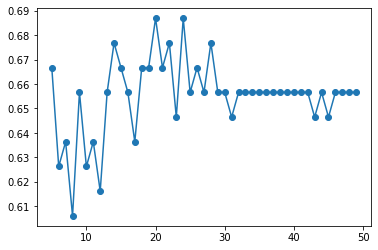

In [45]:
plt.plot(neighbors, acc_values,'o-')

In [46]:
knn = KNeighborsClassifier(n_neighbors=20, metric='minkowski')
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [47]:
accuracy_score(y_test,pred)

0.6868686868686869